# NOTEBOOK_NAME001：Scikit-Learn简介

#### 导入模型/初始化模型/拟合数据/预测数据

此notebook包括**线性回归实例**，**高斯朴素贝叶斯实例**，**降维可视化**的两种方法：**PCA与流形学习**，最后有手写数字识别机器学习实例

画图包括plt与seaborn,含有混淆矩阵、箱型图、二维可视化、误判对比图

学习笔记：Python科学手册

刘文翰 2018/11/24

------------------------------------------------------------------------

**Scikit-learn评估器API的常用步骤：**

(1)通过Sk-learn中导入适当的评估器类，选择模型类。

(2)用合适的数值对模型类进行实例化，配置模型超参数。

(3)整理数据，特征矩阵和目标数组

(4)调用模型实例的`fit()`方法对数据进行拟合

(5)对新数据应用模型：

----- 在有监督学习模型中，通常使用`predict()`方法预测新数据的标签

----- 在无监督学习模型中，通常使用`transform()`或`predict()`方法转换或推断数据的性质

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

## 1.有监督学习实例：简单线性回归

`LinearRegression(fit_intercept=True,normalize=False,copy_X=True,n_jobs=1)`

fit_intercept:是否有截据，如果没有则直线过原点。

normalize:是否将数据归一化。

model set: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
整理后的X.shape: (50, 1)
拟合直线的斜率： [ 1.9776566]
拟合直线的截距： -0.903310725531


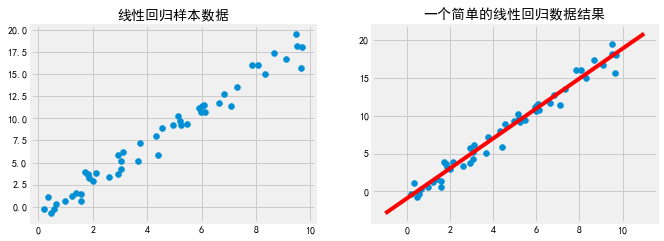

In [2]:
# 生成散点数据
rng = np.random.RandomState(42) #随机数产生器seed
x = 10 * rng.rand(50)  # x.shape=(50,)
y = 2 * x - 1 + rng.randn(50)   # .randn() 产生高斯分布
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
plt.scatter(x, y)
plt.title(u'线性回归样本数据', size=14)

# 导入线性回归模型类
from sklearn.linear_model import LinearRegression

# 实例化模型
model = LinearRegression(fit_intercept=True)
print('model set:',model)

X = x[:, np.newaxis] # 将x整理为[n_samples, n_features]形式
print('整理后的X.shape:',X.shape)

# 训练模型
model.fit(X, y)
print('拟合直线的斜率：',model.coef_)       # 模型的斜率
print('拟合直线的截距：',model.intercept_)

# 预测新数据标签
xfit = np.linspace(-1, 11)  # 生成新数据
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)
plt.subplot(2,2,2)
plt.scatter(x, y)
plt.plot(xfit, yfit, color='r')
plt.title(u'一个简单的线性回归数据结果', size=14)

上述示例生成的散点为$y=2x-1$拟合的斜率与截距也与其接近

在sk-learn中，所有通过`fit()`方法获得的模型参数都带一条下划线

## 2.有监督学习实例：英尾花数据分类

采用**高斯朴素**贝叶斯方法初步分类

假设每个特征中属于每一类的观测值都负荷高斯分布，速度很快，而且不需要超参数

In [4]:
# 载入iris数据集
from sklearn.datasets import load_iris
data=load_iris()
features = data.data # shape:(150, 4)
feature_names = data.feature_names
target = data.target # target:(150,)
target_names = data.target_names

# 随机切分数据集
from sklearn.cross_validation import train_test_split 
Xtrain, Xtest, ytrain, ytest = train_test_split(features, target, random_state=1)

# 导入GussianNB
from sklearn.naive_bayes import GaussianNB
model_GassianNB = GaussianNB() # 实例化
model_GassianNB.fit(Xtrain, ytrain) # 训练
y_model_GassianNB = model_GassianNB.predict(Xtest) # 预测

# 评估accuracy_score
from sklearn.metrics import accuracy_score
print('高斯朴素贝叶斯预测结果：',accuracy_score(ytest,y_model_GassianNB))

import warnings 
warnings.filterwarnings('ignore')

高斯朴素贝叶斯预测结果： 0.973684210526


## 3.无监督学习实例：英尾花数据降维与聚类

**主成成分分析PCA降维**，将数据4个维度降成2个维度

无监督学习**不要使用y标签**

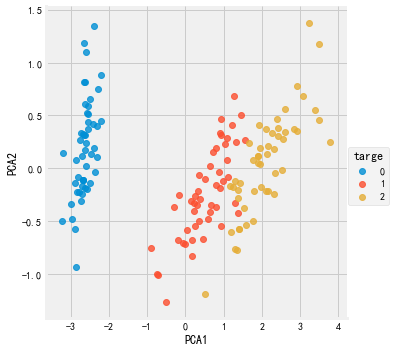

In [5]:
# 降维
from sklearn.decomposition import PCA  # 选择模型类
model_PCA = PCA(n_components = 2) # 初始化模型，超参数设置降为2个维度
model_PCA.fit(features) # 拟合，不要用y标签
features_2D = model_PCA.transform(features) # 输出，将数据转化为2维

# 可视化
iris = pd.DataFrame([])
iris['PCA1'] = features_2D[:, 0]
iris['PCA2'] = features_2D[:, 1]
iris['targe'] = target
sns.lmplot('PCA1', 'PCA2', hue='targe', data=iris, fit_reg=False)

**高斯混合**模型聚类，将数据构造成若干服从高斯分布的概率密度函数簇

(150, 4)


<module 'seaborn' from 'C:\\Users\\lwhpc\\Anaconda3\\envs\\py36\\lib\\site-packages\\seaborn\\__init__.py'>

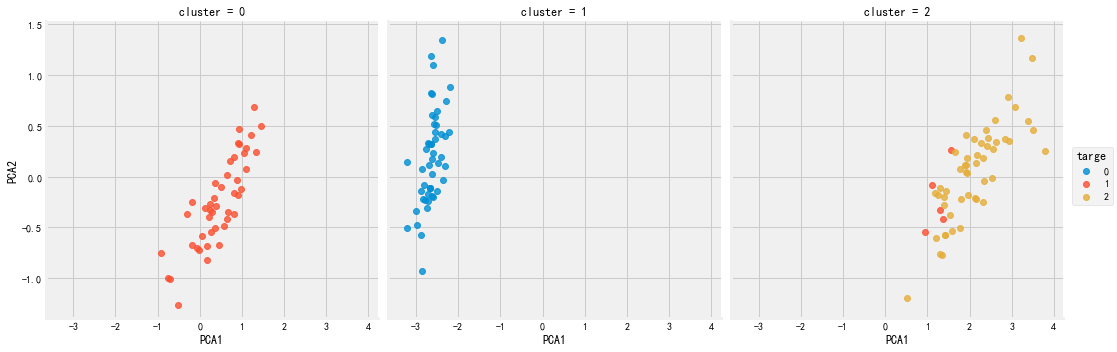

In [6]:
# 聚类
from sklearn.mixture import GMM
model_GMM = GMM(n_components=3,covariance_type='full') 
"""covariance_type:协方差类型，包括{‘full’,‘tied’, ‘diag’, ‘spherical’}四种，
    分别对应完全协方差矩阵（元素都不为零），相同的完全协方差矩阵（HMM会用到），
    对角协方差矩阵（非对角为零，对角不为零），球面协方差矩阵（非对角为零，对角完全相同，球面特性），
    默认‘full’ 完全协方差矩阵 """
model_GMM.fit(features)
y_gmm = model_GMM.predict(features)
print(features.shape)
iris['cluster'] = y_gmm
sns.lmplot('PCA1','PCA2', data=iris, hue='targe',
           col='cluster', fit_reg=False)
sns

4维度使用高斯混合模型0和2类有部分聚类错误，效果明显

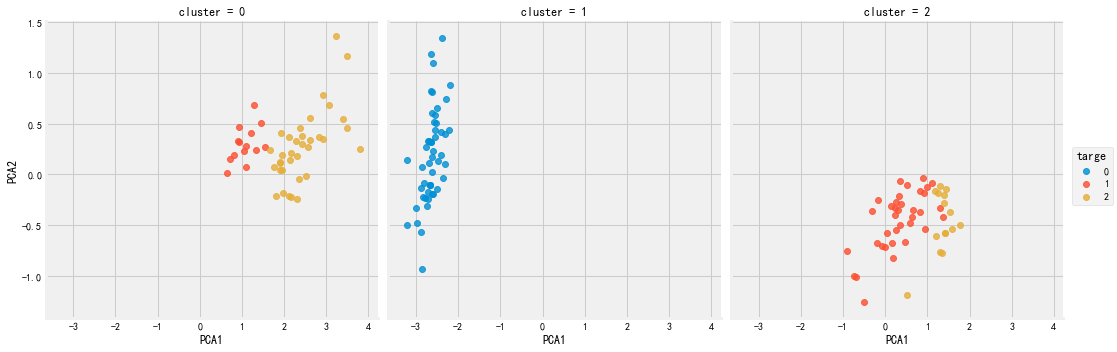

In [7]:
# 聚类
from sklearn.mixture import GMM
model_GMM = GMM(n_components=3,covariance_type='full') 
"""covariance_type:协方差类型，包括{‘full’,‘tied’, ‘diag’, ‘spherical’}四种，
    分别对应完全协方差矩阵（元素都不为零），相同的完全协方差矩阵（HMM会用到），
    对角协方差矩阵（非对角为零，对角不为零），球面协方差矩阵（非对角为零，对角完全相同，球面特性），
    默认‘full’ 完全协方差矩阵 """
model_GMM.fit(features_2D)
y_gmm = model_GMM.predict(features_2D)
iris['cluster'] = y_gmm
sns.lmplot('PCA1','PCA2', data=iris,hue='targe',
           col='cluster', fit_reg=False)

降维度后数据使用高斯混合模型效果反而更差？

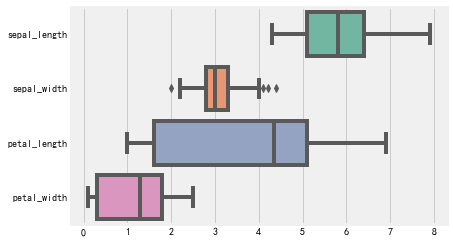

In [8]:
# iris箱型图
iris = sns.load_dataset("iris")
ax = sns.boxplot(data=iris, orient="h", palette="Set2")

## 5.手写数字可视化与数字分类


In [9]:
from sklearn.datasets import load_digits
digits = load_digits()
print('digits.images.shape:',digits.images.shape)

digits.images.shape: (1797, 8, 8)


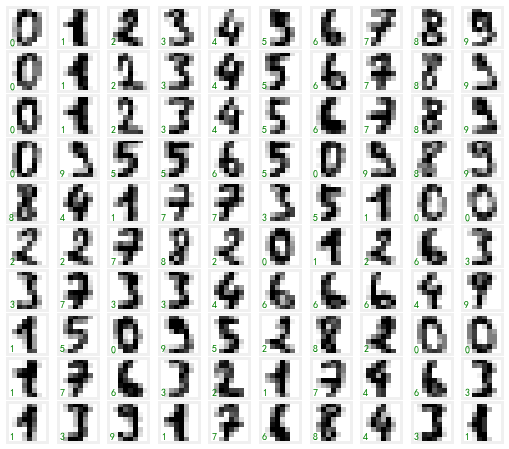

In [10]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')

整理特征矩阵和target

需要一个维度为[n_sample, n_features]的特征矩阵

In [11]:
X = digits.data
print('X.shape:',X.shape,'-sample')
y = digits.target
print('y.shape:',y.shape,'-target')

X.shape: (1797, 64) -sample
y.shape: (1797,) -target


**无监督学习：降维（为了二维可视化）**

尝试使用流形学习算法中的Lsomap

data_projected.shape: (1797, 2)


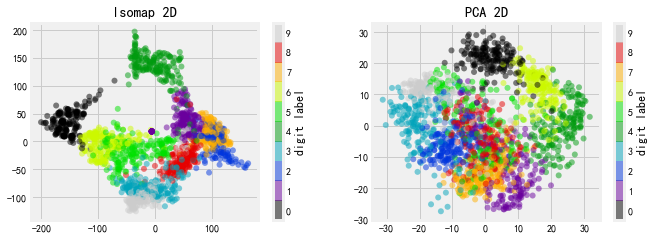

In [12]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
print('data_projected.shape:',data_projected.shape)

plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
plt.title("lsomap 2D")
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,
            edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('spectral', 10))   # 散点图
plt.colorbar(label='digit label', ticks=range(10))   # 颜色条
plt.clim(-0.5, 9.5)

from sklearn.decomposition import PCA
model_PCA_digits = PCA(n_components = 2)
model_PCA_digits.fit(digits.data) 
data_projected = model_PCA_digits.transform(digits.data)
plt.subplot(2,2,2)
plt.title("PCA 2D")
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,
            edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('spectral', 10))   # 散点图
plt.colorbar(label='digit label', ticks=range(10))   # 颜色条
plt.clim(-0.5, 9.5)

**数字分类-高斯朴素贝叶斯**

In [13]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

from sklearn.metrics import accuracy_score #准确率得分
print('数字图片分类准确率：',accuracy_score(ytest, y_model))

数字图片分类准确率： 0.833333333333


**使用混淆矩阵看预测结果**

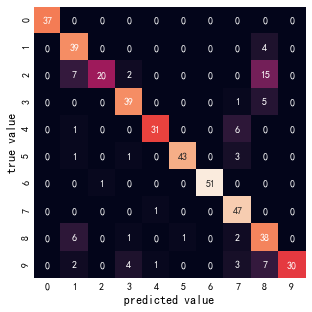

In [14]:
from sklearn.metrics import confusion_matrix  # 导入混淆矩阵模块
mat = confusion_matrix(ytest, y_model) # 混淆矩阵
plt.figure(figsize=(5,5))
sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

误判主要原因：许多2被误判成1和8

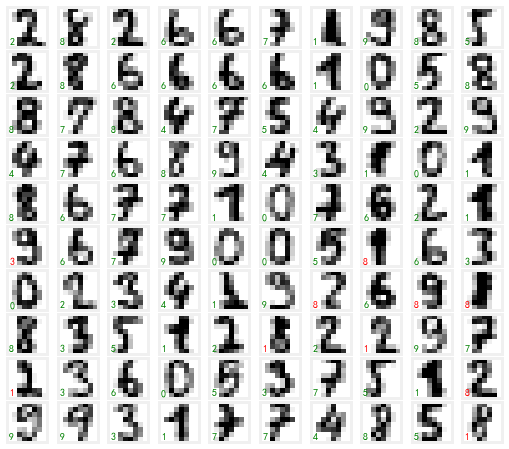

In [15]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

test_images = Xtest.reshape(-1, 8, 8)

for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),
            transform=ax.transAxes,
            color='green' if (ytest[i] == y_model[i]) else 'red')